In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
print(data)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
data = data.drop("Serial No.", axis=1) #刪除無用資料
print(data)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2  

Text(0, 0.5, 'GRE Score')

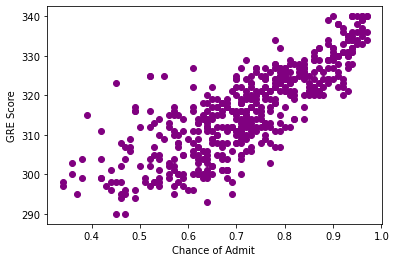

In [12]:
plt.scatter(data["Chance of Admit "], data["GRE Score"], color="purple")
plt.xlabel("Chance of Admit ")
plt.ylabel("GRE Score")

Text(0, 0.5, 'TOEFL Score')

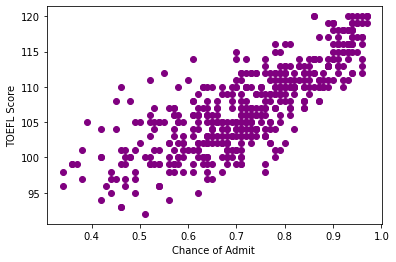

In [13]:
plt.scatter(data["Chance of Admit "], data["TOEFL Score"], color="purple")
plt.xlabel("Chance of Admit ")
plt.ylabel("TOEFL Score")

                   Chance of Admit 
University Rating                  
1                          0.562059
2                          0.626111
3                          0.702901
4                          0.801619
5                          0.888082


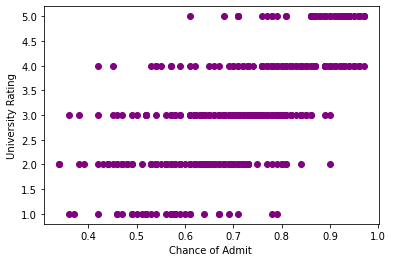

In [34]:
plt.scatter(data["Chance of Admit "], data["University Rating"], color="purple")
plt.xlabel("Chance of Admit ")
plt.ylabel("University Rating")
x = data.loc[:,["University Rating","Chance of Admit "]]
x = x.groupby("University Rating").mean()
print(x)

     Chance of Admit 
SOP                  
1.0          0.538333
1.5          0.546400
2.0          0.589535
2.5          0.645312
3.0          0.678500
3.5          0.712045
4.0          0.782809
4.5          0.850000
5.0          0.885000


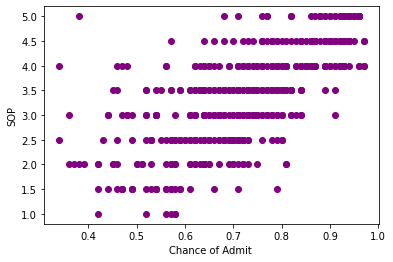

In [32]:
plt.scatter(data["Chance of Admit "], data["SOP"], color="purple")
plt.xlabel("Chance of Admit ")
plt.ylabel("SOP")
x = data.loc[:,["SOP","Chance of Admit "]]
x = x.groupby("SOP").mean()
print(x)

      Chance of Admit 
LOR                   
1.0           0.420000
1.5           0.550000
2.0           0.568261
2.5           0.640600
3.0           0.668485
3.5           0.723023
4.0           0.764149
4.5           0.831905
5.0           0.872600


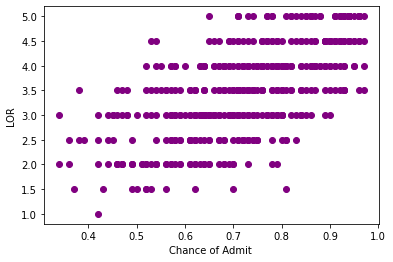

In [31]:
plt.scatter(data["Chance of Admit "], data["LOR "], color="purple")
plt.xlabel("Chance of Admit ")
plt.ylabel("LOR ")
x = data.loc[:,["LOR ","Chance of Admit "]]
x = x.groupby("LOR ").mean()
print(x)

In [30]:
x = data.loc[:,["Research","Chance of Admit "]]
x = x.groupby("Research").mean()
print(x)

          Chance of Admit 
Research                  
0                 0.634909
1                 0.789964


In [22]:
print(data.loc[:,["GRE Score", "TOEFL Score","University Rating", "SOP", "LOR ","CGPA"]].describe()) #查看數值型資料的資訊

        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA  
count  500.000000  
mean     8.576440  
std      0.604813  
min      6.800000  
25%      8.127500  
50%      8.560000  
75%      9.040000  
max      9.920000  


In [25]:
data.loc[:,["GRE Score", "TOEFL Score","University Rating", "SOP", "LOR ","CGPA"]] = StandardScaler().fit_transform(data.loc[:,["GRE Score", "TOEFL Score","University Rating", "SOP", "LOR ","CGPA"]])
#數值型資料標準化

In [138]:
result = data["Chance of Admit "] #指定訓練目標
data = data.drop("Chance of Admit ", axis=1)


In [140]:
print(data)

     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0     1.819238     1.778865           0.775582  1.137360  1.098944  1.776806   
1     0.667148    -0.031601           0.775582  0.632315  1.098944  0.485859   
2    -0.041830    -0.525364          -0.099793 -0.377773  0.017306 -0.954043   
3     0.489904     0.462163          -0.099793  0.127271 -1.064332  0.154847   
4    -0.219074    -0.689952          -0.975168 -1.387862 -0.523513 -0.606480   
..         ...          ...                ...       ...       ...       ...   
495   1.376126     0.132987           1.650957  1.137360  0.558125  0.734118   
496   1.819238     1.614278           1.650957  1.642404  1.639763  2.140919   
497   1.198882     2.108041           1.650957  1.137360  1.639763  1.627851   
498  -0.396319    -0.689952           0.775582  0.632315  1.639763 -0.242367   
499   0.933015     0.955926           0.775582  1.137360  1.098944  0.767220   

     Research  
0           1  
1      

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
feature, feature_test, result, result_test = train_test_split(data, result, test_size=0.2, random_state=0)
#分成訓練資料、訓練目標、測試資料、測試目標

In [143]:
feature.index = [i for i in range(0,400)]
result.index = [i for i in range(0,400)]
#由於現在訓練資料的索引值為不連續 因此從新設定索引值已以方便接下來的k摺交叉驗證

In [144]:
print(feature.shape)
print(result.shape)

(400, 7)
(400,)


In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import optimizers

In [152]:
model = Sequential()

model.add(Dense(16, input_dim = 7, activation="sigmoid"))
model.add(Dense(8, activation="sigmoid"))




model.add(Dense(1))

model.compile(optimizer=optimizers.RMSprop(), loss="mse", metrics=["mae"])

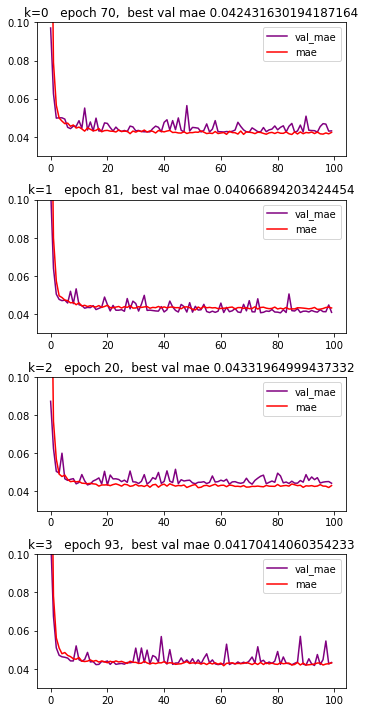

In [153]:
ksize = len(feature)/4   #設定每一摺所需要的測試資料量
all_mae = []             #儲存每一階段的訓練資料MAE
all_val_mae = []         #儲存每一階段的測試資料MAE
canvas = plt.figure(figsize=(5,10))
weight = model.get_weights()    #設定空的權重設定 以利於每一摺訓練時從新設定初始權重

for i in range(4):
    k_feature_test = feature.loc[i*ksize : (i+1)*ksize]         #指定每一摺測試資料
    k_result_test = result.loc[i*ksize : (i+1)*ksize]
    
    k_feature_train = pd.concat([feature.loc[:i*ksize], feature.loc[(i+1)*ksize:]])#指定每一摺訓練資料
    k_result_train = pd.concat([result.loc[:i*ksize], result.loc[(i+1)*ksize:]])
    
    model.set_weights(weight)  #重新設定權重
    history = model.fit(k_feature_train, k_result_train, validation_data=(k_feature_test, k_result_test), verbose=0, epochs=100, batch_size=8)
    
    best_val_mae_index = np.argmin(history.history["val_mae"])  #尋找驗證資料後獲得的最佳mae的索引(週期)
    best_val_mae = history.history["val_mae"][best_val_mae_index]     #尋找驗證資料後獲得的最佳mae 
    
    chart = canvas.add_subplot(4,1,i+1)
    chart.plot(history.history["val_mae"], color="purple")
    chart.plot(history.history["mae"], color="red")
    chart.legend(["val_mae","mae"])
    chart.set_title(f"k={i}   epoch {best_val_mae_index},  best val mae {best_val_mae}")
    chart.set_ylim((0.03,0.1))
    canvas.tight_layout()
    
    all_mae.append(history.history["mae"])
    all_val_mae.append(history.history["val_mae"])
    
     
    
    

In [154]:
print(np.array(all_val_mae).shape)

(4, 100)


(0.03, 0.08)

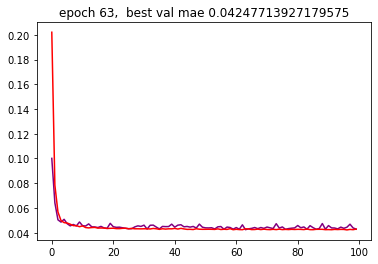

In [155]:

val_mae_mean = np.mean(all_val_mae,axis=0)  #驗證資料每周期的mae平均

mae_mean = np.mean(all_mae,axis=0) #訓練資料每周期的mae平均

plt.plot(val_mae_mean,color="purple")
plt.plot(mae_mean, color="red")
chart.legend(["val_mae","mae"])

plt.title(f"epoch {np.argmin(val_mae_mean)},  best val mae {np.min(val_mae_mean)}") #找出驗證資料中平均mae最低的週期
chart.set_ylim((0.03,0.08))

In [156]:
model.set_weights(weight)
model.fit(feature, result, epochs=np.argmin(val_mae_mean), batch_size=8, verbose=1)

Epoch 1/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0486 - mae: 0.1720
Epoch 2/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0069 - mae: 0.0643
Epoch 3/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0505
Epoch 4/63
50/50 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0479
Epoch 5/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0042 - mae: 0.0469
Epoch 6/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0463
Epoch 7/63
50/50 [==============================] - 0s 3ms/step - loss: 0.0039 - mae: 0.0453
Epoch 8/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0454
Epoch 9/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0441
Epoch 10/63
50/50 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0441
Epoch 11/63
50/50 [==============================] - 0s 2ms/step - lo

In [157]:
score = model.evaluate(feature_test, result_test)
print("mae:",score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0041 - mae: 0.0482
mae: 0.048189349472522736
